# Aggregate variables on county level and save in common csv file

In [1]:
import os
import sys
import pathlib
from pathlib import Path
import xarray as xr
import numpy as np
dir_preprocessing = os.path.join(str(pathlib.Path().resolve()))
sys.path.append(dir_preprocessing)

import historic_metric as fct_his
from historic_metric import CROPS_DICT

dir_data = os.path.join(dir_preprocessing, 'data')

In [2]:
lon_bounds = [-125, -66]
lat_bounds = [50, 24]
geo_area = 'us'

In [3]:
crops = list(CROPS_DICT[geo_area].keys())
print(crops)

['wheat', 'maize', 'soybean']


In [4]:
filenames_dict = fct_his.config_FILEPATHS(dir_data, geo_area)

In [5]:
filenames_dict['input']['shape_crop']

'/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/data/input/shapefiles/us_{crop}_shapefile/us_{crop}_cropping_regions.shp'

In [6]:
t_annual = xr.open_dataset(filenames_dict['calc']['annual_file'].format(variable='tasmax'))
sm_annual = xr.open_dataset(filenames_dict['calc']['annual_file'].format(variable='SMroot'))

In [7]:
ds_var_list = [t_annual, sm_annual] 
var_abbrev = ['T','M'] 

crop = 'soybean'
seasons = ['spring', 'summer']
years = np.arange(1980, 2022)

melted_list = fct_his.compute_counties_hist(filenames_dict, ds_var_list, var_abbrev, crop, seasons, years)
final_data = fct_his.final_pd(melted_list, crop, filenames_dict, True)

variable:  T
season:  spring


/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/historic_metric.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  id_vars = [col for col in merged_data.columns if col not in years]


season:  summer


/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/historic_metric.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  id_vars = [col for col in merged_data.columns if col not in years]


variable:  M
season:  spring


/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/historic_metric.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  id_vars = [col for col in merged_data.columns if col not in years]


season:  summer


/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/historic_metric.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  id_vars = [col for col in merged_data.columns if col not in years]


     State   County                                           geometry  \
0  ALABAMA   GREENE  POLYGON ((-87.71393 33.00694, -87.71172 33.005...   
1  ALABAMA     HALE  POLYGON ((-87.42078 32.87446, -87.42138 32.831...   
2  ALABAMA  MARENGO  POLYGON ((-87.47176 32.26500, -87.47882 32.266...   
3  ALABAMA  PICKENS  POLYGON ((-88.17110 32.99615, -88.29576 32.992...   
4  ALABAMA   SUMTER  POLYGON ((-87.92733 32.31075, -87.97775 32.310...   

   season  year          T         M  
0  spring  1980  29.816952  0.367117  
1  spring  1980  29.816952  0.367117  
2  spring  1980  29.395550  0.384691  
3  spring  1980  29.519749  0.387594  
4  spring  1980  29.601929  0.374357  


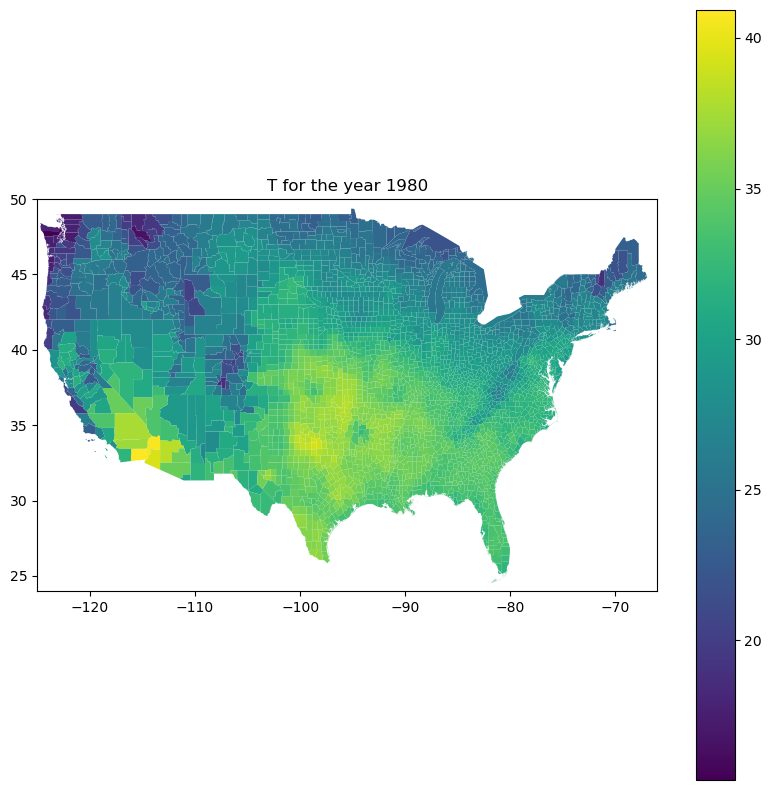

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
year = 1980
var_name = 'T'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_year = melted_data[final_data['year'] == year]
df_year.plot(column=var_name, cmap='viridis', ax=ax, legend=True)
ax.set_title(f'{var_name} for the year '+f'{year}')
plt.xlim(lon_bounds[0], lon_bounds[1])
plt.ylim(lat_bounds[1], lat_bounds[0])
plt.show()